In [1]:
import requests
from bs4 import BeautifulSoup
import json

import numpy as np
import pandas as pd

import datetime

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

import folium
import googlemaps

In [2]:
base_url = "https://api.odcloud.kr/api/15077756/v1/vaccine-stat" # 코로나 접종 통계 데이터 api url
page = "1"
perPage = "10000"
serviceKey = "****************"
lastDate = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S') # 현재 날짜

In [3]:
request_url = base_url + "?" + "&page=" + page + "&perPage=" + perPage \
            + "&serviceKey=" + serviceKey + "&cond[baseDate::LTE]=" + lastDate

response = requests.get(request_url)
soup = BeautifulSoup(response.text)

# request_url

In [4]:
data = json.loads(soup.text)

print(data["currentCount"])
print(data["data"])

5766
[{'accumulatedFirstCnt': 449535, 'accumulatedSecondCnt': 0, 'accumulatedThirdCnt': 0, 'baseDate': '2021-03-11 00:00:00', 'firstCnt': 51100, 'id': 1, 'secondCnt': 0, 'sido': '전국', 'thirdCnt': 0, 'totalFirstCnt': 500635, 'totalSecondCnt': 0, 'totalThirdCnt': 0}, {'accumulatedFirstCnt': 61232, 'accumulatedSecondCnt': 0, 'accumulatedThirdCnt': 0, 'baseDate': '2021-03-11 00:00:00', 'firstCnt': 12595, 'id': 2, 'secondCnt': 0, 'sido': '서울특별시', 'thirdCnt': 0, 'totalFirstCnt': 73827, 'totalSecondCnt': 0, 'totalThirdCnt': 0}, {'accumulatedFirstCnt': 36734, 'accumulatedSecondCnt': 0, 'accumulatedThirdCnt': 0, 'baseDate': '2021-03-11 00:00:00', 'firstCnt': 3311, 'id': 3, 'secondCnt': 0, 'sido': '부산광역시', 'thirdCnt': 0, 'totalFirstCnt': 40045, 'totalSecondCnt': 0, 'totalThirdCnt': 0}, {'accumulatedFirstCnt': 23101, 'accumulatedSecondCnt': 0, 'accumulatedThirdCnt': 0, 'baseDate': '2021-03-11 00:00:00', 'firstCnt': 2310, 'id': 4, 'secondCnt': 0, 'sido': '대구광역시', 'thirdCnt': 0, 'totalFirstCnt': 25

In [5]:
# 수집된 데이터를 백신 통계 변수(vaccine_statement)에 저장
# json type 데이터를 dataFrame type으로 바로 변환
vaccine_statement = pd.DataFrame.from_dict(data["data"])

vaccine_statement

,accumulatedFirstCnt,accumulatedSecondCnt,accumulatedThirdCnt,baseDate,firstCnt,id,secondCnt,sido,thirdCnt,totalFirstCnt,totalSecondCnt,totalThirdCnt
0,449535,0,0,2021-03-11 00:00:00,51100,1,0,전국,0,500635,0,0
1,61232,0,0,2021-03-11 00:00:00,12595,2,0,서울특별시,0,73827,0,0
2,36734,0,0,2021-03-11 00:00:00,3311,3,0,부산광역시,0,40045,0,0
3,23101,0,0,2021-03-11 00:00:00,2310,4,0,대구광역시,0,25411,0,0
4,23879,0,0,2021-03-11 00:00:00,1791,5,0,인천광역시,0,25670,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5761,1576252,1553881,1008198,2022-01-24 00:00:00,7,5762,25,전라북도,259,1576259,1553906,1008457
5762,1634332,1609061,1083301,2022-01-24 00:00:00,14,5763,31,전라남도,228,1634346,1609092,1083529
5763,2264890,2217944,1318051,2022-01-24 00:00:00,24,5764,40,경상북도,286,2264914,2217984,1318337
5764,2851979,2799063,1608011,2022-01-24 00:00:00,13,5765,52,경상남도,303,2851992,2799115,1608314


In [6]:
# 열 이름 수정
vaccine_statement.rename(columns = {"baseDate" : "날짜", "sido" : "지역", 
                                    "firstCnt" : "1차 접종자 수", "secondCnt" : "2차 접종자 수", "thirdCnt" : "3차 접종자 수", 
                                    "totalFirstCnt" : "총 1차 접종자 수", 
                                    "totalSecondCnt" : "총 2차 접종자 수", 
                                    "totalThirdCnt" : "총 3차 접종자 수", 
                                    "accumulatedFirstCnt" : "전일까지 1차 누적 접종자 수", 
                                    "accumulatedSecondCnt" : "전일까지 2차 누적 접종자 수", 
                                    "accumulatedThirdCnt" : "전일까지 3차 누적 접종자 수"}, inplace=True)

In [7]:
# 열 순서 변경
vaccine_statement = vaccine_statement[["id", "날짜", "지역", 
                                       "1차 접종자 수", "2차 접종자 수", "3차 접종자 수", 
                                       "총 1차 접종자 수", "총 2차 접종자 수", "총 3차 접종자 수", 
                                       "전일까지 1차 누적 접종자 수", "전일까지 2차 누적 접종자 수", "전일까지 3차 누적 접종자 수"]]

vaccine_statement

,id,날짜,지역,1차 접종자 수,2차 접종자 수,3차 접종자 수,총 1차 접종자 수,총 2차 접종자 수,총 3차 접종자 수,전일까지 1차 누적 접종자 수,전일까지 2차 누적 접종자 수,전일까지 3차 누적 접종자 수
0,1,2021-03-11 00:00:00,전국,51100,0,0,500635,0,0,449535,0,0
1,2,2021-03-11 00:00:00,서울특별시,12595,0,0,73827,0,0,61232,0,0
2,3,2021-03-11 00:00:00,부산광역시,3311,0,0,40045,0,0,36734,0,0
3,4,2021-03-11 00:00:00,대구광역시,2310,0,0,25411,0,0,23101,0,0
4,5,2021-03-11 00:00:00,인천광역시,1791,0,0,25670,0,0,23879,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5761,5762,2022-01-24 00:00:00,전라북도,7,25,259,1576259,1553906,1008457,1576252,1553881,1008198
5762,5763,2022-01-24 00:00:00,전라남도,14,31,228,1634346,1609092,1083529,1634332,1609061,1083301
5763,5764,2022-01-24 00:00:00,경상북도,24,40,286,2264914,2217984,1318337,2264890,2217944,1318051
5764,5765,2022-01-24 00:00:00,경상남도,13,52,303,2851992,2799115,1608314,2851979,2799063,1608011


In [8]:
# vaccine_statement에서 전국 수집 통계 행 만을 선택해 새로운 전국 백신 통계 변수(vacc_state_wide)에 저장
vacc_state_wide = vaccine_statement.loc[vaccine_statement["지역"].str.contains("전국"), :]

vacc_state_wide

,id,날짜,지역,1차 접종자 수,2차 접종자 수,3차 접종자 수,총 1차 접종자 수,총 2차 접종자 수,총 3차 접종자 수,전일까지 1차 누적 접종자 수,전일까지 2차 누적 접종자 수,전일까지 3차 누적 접종자 수
0,1,2021-03-11 00:00:00,전국,51100,0,0,500635,0,0,449535,0,0
18,19,2021-03-12 00:00:00,전국,42527,0,0,546277,0,0,503750,0,0
36,37,2021-03-13 00:00:00,전국,35684,0,0,583658,0,0,547974,0,0
54,55,2021-03-14 00:00:00,전국,3487,0,0,587884,0,0,584397,0,0
72,73,2021-03-15 00:00:00,전국,1074,0,0,588958,0,0,587884,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,5677,2022-01-20 00:00:00,전국,9980,44538,212471,44530525,43676631,24219031,44520545,43632093,24006560
5694,5695,2022-01-21 00:00:00,전국,10273,43941,277176,44542299,43722568,24500126,44532026,43678627,24222950
5712,5713,2022-01-22 00:00:00,전국,14999,57579,460192,44559189,43782676,24965601,44544190,43725097,24505409
5730,5731,2022-01-23 00:00:00,전국,9349,17952,258013,44568730,43801851,25232604,44559381,43783899,24974591


In [9]:
# 시각화에 한글 처리를 위한 조정
%matplotlib inline
font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() # NanumGothic.otf
matplotlib.rc('font', family=font_name)

<AxesSubplot:>

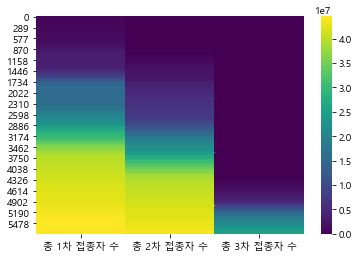

In [10]:
# 수집된 데이터 내의 총 접종자 수를 기반으로 일단 데이터 시각화
sns.heatmap(vacc_state_wide[['총 1차 접종자 수', '총 2차 접종자 수', '총 3차 접종자 수']], cmap='viridis')

In [11]:
# 데이터가 일률화 되어 있지 않아, 시각화가 제대로 도출되지 않음
# Min-max algorithm 사용을 위한 최댓값 도출
max_col = vacc_state_wide[['총 1차 접종자 수', '총 2차 접종자 수', '총 3차 접종자 수']].max()

max_col

총 1차 접종자 수    44569299
총 2차 접종자 수    43803685
총 3차 접종자 수    25245905
dtype: int64

In [12]:
# 일률적인 시각화를 위해 각 열을 max_col로 나누어 접종자 스케일 변수(inoculator_mm)에 저장
# inoculator = vacc_state_wide[['firstCnt', 'totalFirstCnt']] / max_col
inoculator_mm = vacc_state_wide[['총 1차 접종자 수', '총 2차 접종자 수', '총 3차 접종자 수']] / max_col

inoculator_mm

,총 1차 접종자 수,총 2차 접종자 수,총 3차 접종자 수
0,0.011233,0.000000,0.000000
18,0.012257,0.000000,0.000000
36,0.013096,0.000000,0.000000
54,0.013190,0.000000,0.000000
72,0.013214,0.000000,0.000000
...,...,...,...
5676,0.999130,0.997099,0.959325
5694,0.999394,0.998148,0.970459
5712,0.999773,0.999520,0.988897
5730,0.999987,0.999958,0.999473


<AxesSubplot:>

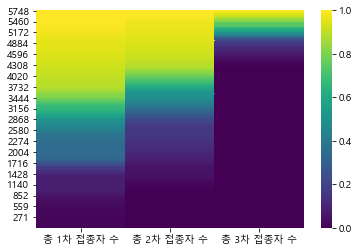

In [13]:
# 전국 총 누적 1차 접종자 수를 기준으로 시각화
sns.heatmap(inoculator_mm.sort_values(by='총 1차 접종자 수', ascending=False), cmap='viridis')

In [14]:
inoculator = vacc_state_wide[['1차 접종자 수', '2차 접종자 수', '3차 접종자 수', 
                              '총 1차 접종자 수', '총 2차 접종자 수', '총 3차 접종자 수']]

inoculator

,1차 접종자 수,2차 접종자 수,3차 접종자 수,총 1차 접종자 수,총 2차 접종자 수,총 3차 접종자 수
0,51100,0,0,500635,0,0
18,42527,0,0,546277,0,0
36,35684,0,0,583658,0,0
54,3487,0,0,587884,0,0
72,1074,0,0,588958,0,0
...,...,...,...,...,...,...
5676,9980,44538,212471,44530525,43676631,24219031
5694,10273,43941,277176,44542299,43722568,24500126
5712,14999,57579,460192,44559189,43782676,24965601
5730,9349,17952,258013,44568730,43801851,25232604


In [15]:
# 그래프 x축에 날짜를 출력해주기 위한 dayList 만들기
date = datetime.datetime(2021, 3, 11, 0, 0, 0) # 기준 날짜 : 2021.03.11

# 기준 날짜로 부터 마지막 날까지 날짜 리스트(date_list) 생성
date_list = [date + datetime.timedelta(days=x) for x in range(len(inoculator.index))]

# "월.일" 형식의 날짜 리스트(datList) 만들기
dayList = []
for date in date_list :
    dayList.append(str(date.month) + "." + str(date.day))

dayList

['3.11',
 '3.12',
 '3.13',
 '3.14',
 '3.15',
 '3.16',
 '3.17',
 '3.18',
 '3.19',
 '3.20',
 '3.21',
 '3.22',
 '3.23',
 '3.24',
 '3.25',
 '3.26',
 '3.27',
 '3.28',
 '3.29',
 '3.30',
 '3.31',
 '4.1',
 '4.2',
 '4.3',
 '4.4',
 '4.5',
 '4.6',
 '4.7',
 '4.8',
 '4.9',
 '4.10',
 '4.11',
 '4.12',
 '4.13',
 '4.14',
 '4.15',
 '4.16',
 '4.17',
 '4.18',
 '4.19',
 '4.20',
 '4.21',
 '4.22',
 '4.23',
 '4.24',
 '4.25',
 '4.26',
 '4.27',
 '4.28',
 '4.29',
 '4.30',
 '5.1',
 '5.2',
 '5.3',
 '5.4',
 '5.5',
 '5.6',
 '5.7',
 '5.8',
 '5.9',
 '5.10',
 '5.11',
 '5.12',
 '5.13',
 '5.14',
 '5.15',
 '5.16',
 '5.17',
 '5.18',
 '5.19',
 '5.20',
 '5.21',
 '5.22',
 '5.23',
 '5.24',
 '5.25',
 '5.26',
 '5.27',
 '5.28',
 '5.29',
 '5.30',
 '5.31',
 '6.1',
 '6.2',
 '6.3',
 '6.4',
 '6.5',
 '6.6',
 '6.7',
 '6.8',
 '6.9',
 '6.10',
 '6.11',
 '6.12',
 '6.13',
 '6.14',
 '6.15',
 '6.16',
 '6.17',
 '6.18',
 '6.19',
 '6.20',
 '6.21',
 '6.22',
 '6.23',
 '6.24',
 '6.25',
 '6.26',
 '6.27',
 '6.28',
 '6.29',
 '6.30',
 '7.1',
 '7.2',
 '7

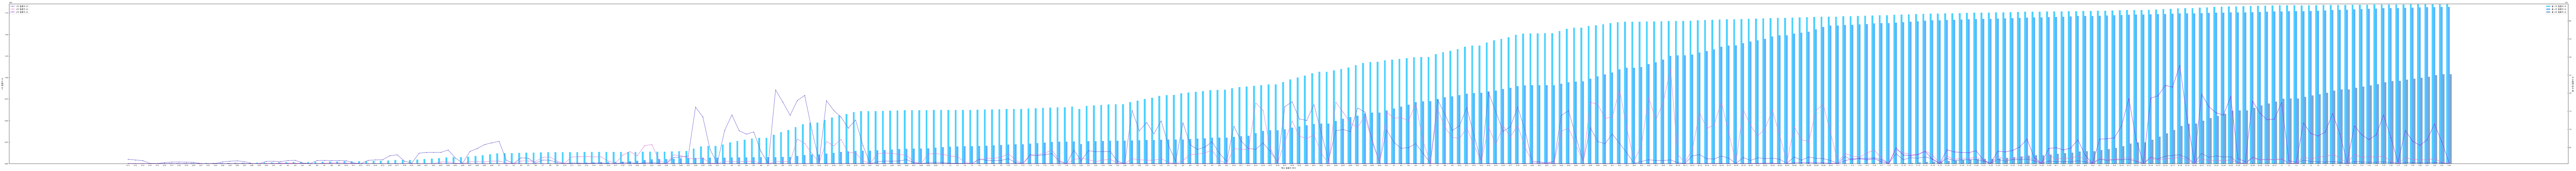

In [16]:
# 추세선 그리기
# 일일 접종자 수 : 꺾은선 그래프
# 총 누적 접종자 수 : 막대 그래프

# 그래프 기본 틀 만들기
plt.style.use('default') # 폰트 세팅 후 실행 시 기존 폰트 세팅이 초기화되어버림(재조정 필수!!!)

# # 시각화 한글 처리를 위한 조정
%matplotlib inline
font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() # NanumGothic.otf
matplotlib.rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (150, 10) # 가로길이, 세로길이
plt.rcParams['font.size'] = 8 # 글자크기

# 각 축에 담을 정보 설정
x = dayList
y1_01 = inoculator["1차 접종자 수"]
y1_02 = inoculator["2차 접종자 수"]
y1_03 = inoculator["3차 접종자 수"]
y2_01 = inoculator["총 1차 접종자 수"]
y2_02 = inoculator["총 2차 접종자 수"]
y2_03 = inoculator["총 3차 접종자 수"]

# 그래프 그리기
fig, ax1 = plt.subplots()

# 1차 접종자 수 그래프 설정
ax1.plot(x, y1_01, '-o', color='slateblue', markersize=2.5, linewidth=2, alpha=0.7, label='1차 접종자 수')
ax1.plot(x, y1_02, '-o', color='orchid', markersize=2.5, linewidth=2, alpha=0.7, label='2차 접종자 수')
ax1.plot(x, y1_03, '-o', color='blueviolet', markersize=2.5, linewidth=2, alpha=0.7, label='3차 접종자 수')
ax1.set_ylim(inoculator["1차 접종자 수"].min(), inoculator["1차 접종자 수"].max() + 1000000) # 축 범위 지정
# 그래프 상단의 여백을 위해 최댓값에 추가로 값 더해주기
ax1.set_xlabel('백신 접종자 추이') # x축 레이블 지정
ax1.set_ylabel('1차 접종자 수') # y1축 레이블 지정
ax1.tick_params(axis='both', direction='in')


# 총 누적 접종자 수 그래프 설정
ax2 = ax1.twinx()
x_num = np.arange(len(x))
ax2.bar(x_num-0.25, y2_01, color='deepskyblue', alpha=0.7, width=0.25, label='총 1차 접종자 수')
ax2.bar(x_num+0.0, y2_02, color='dodgerblue', alpha=0.7, width=0.25, label='총 2차 접종자 수')
ax2.bar(x_num+0.25, y2_03, color='steelblue', alpha=0.7, width=0.25, label='총 3차 접종자 수')
ax2.set_ylim(inoculator["총 1차 접종자 수"].min(), inoculator["총 1차 접종자 수"].max() + 100000)
ax2.set_ylabel('총 누적 접종자 수') # y2축 레이블 지정
ax2.tick_params(axis='y', direction='in')

# 그래프 순서를 위한 z-index 조절
ax1.set_zorder(ax2.get_zorder() + 10)
ax1.patch.set_visible(False)

# 범례 추기하기
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# 생성된 그래프를 이미지 파일로 저장
plt.tight_layout()
plt.savefig('./image/nationwide_graph_liner_and_bar.png')

plt.show()

In [17]:
# 전국 지도에 전국 백신 접종자 수 시각화하기
geo_path = './data/skorea_provinces_geo_simple.json' # 시도 단위 geoJson
geo_str = json.load(open(geo_path, encoding='utf-8'))

geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '39',
    'name': '제주특별자치도',
    'name_eng': 'Jeju-do',
    'base_year': '2013'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[126.95749379078595, 33.52245641407977],
       [126.97319896844937, 33.49875407762396],
       [126.96872405188999, 33.48622329800168],
       [126.94954584505405, 33.489544759407586],
       [126.94279608185538, 33.50103054305068],
       [126.95749379078595, 33.52245641407977]]],
     [[[126.7825845509244, 33.56393550760943],
       [126.8018582544952, 33.55370235630926],
       [126.82997198813513, 33.556850838139745],
       [126.8331417008612, 33.543008206660225],
       [126.85956040109559, 33.523745962792475],
       [126.87389326757639, 33.528409852451844],
       [126.90448695242354, 33.52306487302841],
       [126.91799070614931, 33.49833730982538],
       [126.90673163147841, 33.48381434309957],
       [126.91451306459106, 33.46996423357717],
 

In [18]:
# tiles : 지도 타입 (default type or "Stamen Terrain" or "Stamen Toner")
# 초기 위치 : 대구시청 좌표(128.60218479988586,35.87374999245433)
map = folium.Map(location=[35.87374999245433, 128.60218479988586], zoom_start=7, tiles='Stamen Toner')

map

In [19]:
# 수집된 데이터 중 마지막 날의 지역별 백신 접종자 수를 모아 vacc_stat_area_lastDate에 저장
date = datetime.datetime.now().strftime('%Y-%m-%d')
vacc_stat_area_lastDate = vaccine_statement.loc[vaccine_statement["날짜"].str.contains(date), :]

# 전국 총 백신 접종자 수를 담은 행 삭제하기
index = vacc_stat_area_lastDate[ vacc_stat_area_lastDate["지역"] == "전국" ].index
vacc_stat_area_lastDate = vacc_stat_area_lastDate.drop(index)

vacc_stat_area_lastDate

,id,날짜,지역,1차 접종자 수,2차 접종자 수,3차 접종자 수,총 1차 접종자 수,총 2차 접종자 수,총 3차 접종자 수,전일까지 1차 누적 접종자 수,전일까지 2차 누적 접종자 수,전일까지 3차 누적 접종자 수
5749,5750,2022-01-24 00:00:00,서울특별시,86,313,2235,8248713,8121284,4568382,8248627,8120971,4566147
5750,5751,2022-01-24 00:00:00,부산광역시,23,68,391,2852328,2801987,1637062,2852305,2801919,1636671
5751,5752,2022-01-24 00:00:00,대구광역시,13,58,250,2000265,1958332,1039290,2000252,1958274,1039040
5752,5753,2022-01-24 00:00:00,대전광역시,11,46,247,1233107,1210594,669588,1233096,1210548,669341
5753,5754,2022-01-24 00:00:00,인천광역시,49,109,1080,2536825,2495330,1424934,2536776,2495221,1423854
5754,5755,2022-01-24 00:00:00,광주광역시,4,25,117,1249530,1228123,726791,1249526,1228098,726674
5755,5756,2022-01-24 00:00:00,세종특별자치시,7,24,70,291203,284798,147596,291196,284774,147526
5756,5757,2022-01-24 00:00:00,울산광역시,7,31,192,958393,939953,511417,958386,939922,511225
5757,5758,2022-01-24 00:00:00,경기도,251,815,6047,11671924,11471969,6402123,11671673,11471154,6396076
5758,5759,2022-01-24 00:00:00,강원도,2,28,147,1333785,1312779,837213,1333783,1312751,837066


In [20]:
# 데이터 일률화를 위한 Min-max algorithm 적용
# ['총 1차 접종자 수'] 열을 대상으로, 
# 가장 낮은 누계 졉종자수와 가장 높은 누계 접종자 수를 가지는 지역을 일종의 점수 개념으로 간격을 벌림
# (지도에서 보다 더 잘 비교되도록 하기 위함)

# 1) newMax-newMin 를 곱해주는 이유 : 0~1 대신에 특정한 range 로 변환 (여기서는 1~100)
# 2) newMin 인 1을 더해주는 이유 : 최소값인 0을 갖는 데이터가 시각화 시 아예 데이터가 표현되지 않는 것을 방지

def reRange(x, oldMin, oldMax, newMin, newMax):
    return (x - oldMin)*(newMax - newMin) / (oldMax - oldMin) + newMin 

In [21]:
oldMin = vacc_stat_area_lastDate["총 1차 접종자 수"].min()
oldMax = vacc_stat_area_lastDate["총 1차 접종자 수"].max()

vacc_stat_area_lastDate["총 1차 접종자 수_mm"] = reRange(vacc_stat_area_lastDate['총 1차 접종자 수'], oldMin, oldMax, 1, 100)

vacc_stat_area_lastDate

,id,날짜,지역,1차 접종자 수,2차 접종자 수,3차 접종자 수,총 1차 접종자 수,총 2차 접종자 수,총 3차 접종자 수,전일까지 1차 누적 접종자 수,전일까지 2차 누적 접종자 수,전일까지 3차 누적 접종자 수,총 1차 접종자 수_mm
5749,5750,2022-01-24 00:00:00,서울특별시,86,313,2235,8248713,8121284,4568382,8248627,8120971,4566147,70.221756
5750,5751,2022-01-24 00:00:00,부산광역시,23,68,391,2852328,2801987,1637062,2852305,2801919,1636671,23.279026
5751,5752,2022-01-24 00:00:00,대구광역시,13,58,250,2000265,1958332,1039290,2000252,1958274,1039040,15.866996
5752,5753,2022-01-24 00:00:00,대전광역시,11,46,247,1233107,1210594,669588,1233096,1210548,669341,9.193549
5753,5754,2022-01-24 00:00:00,인천광역시,49,109,1080,2536825,2495330,1424934,2536776,2495221,1423854,20.534490
5754,5755,2022-01-24 00:00:00,광주광역시,4,25,117,1249530,1228123,726791,1249526,1228098,726674,9.336411
5755,5756,2022-01-24 00:00:00,세종특별자치시,7,24,70,291203,284798,147596,291196,284774,147526,1.000000
5756,5757,2022-01-24 00:00:00,울산광역시,7,31,192,958393,939953,511417,958386,939922,511225,6.803834
5757,5758,2022-01-24 00:00:00,경기도,251,815,6047,11671924,11471969,6402123,11671673,11471154,6396076,100.000000
5758,5759,2022-01-24 00:00:00,강원도,2,28,147,1333785,1312779,837213,1333783,1312751,837066,10.069339


In [22]:
# 지역 구분 열을 index로 가지는 pivot table(vacc_area_pivot)생성
vacc_area_dump = pd.DataFrame(list(vacc_stat_area_lastDate['총 1차 접종자 수_mm']), 
                              index = vacc_stat_area_lastDate['지역'], columns = ['총 1차 접종자 수']) 

vacc_area_dump

,총 1차 접종자 수
지역,
서울특별시,70.221756
부산광역시,23.279026
대구광역시,15.866996
대전광역시,9.193549
인천광역시,20.534490
광주광역시,9.336411
세종특별자치시,1.000000
울산광역시,6.803834
경기도,100.000000


In [23]:
# 전국 지역별 1차 접종자 수 시각화
map.choropleth(geo_data = geo_str, # 전국 시도 행정구역별 polygon drawing
               data = vacc_area_dump['총 1차 접종자 수'], # 시각화의 대상이 될 데이터
               columns = [vacc_area_dump.index, vacc_area_dump['총 1차 접종자 수']], # vacc_area_pivot의 index 칼럼을 가져와 인식하고
               fill_color = 'BuGn',
               key_on = 'feature.properties.name')
# fill_color : 'BuGn', 'BuPu', 'GnBu', 'OrRd', 'PuBu', 'PuBuGn', 'PuRd', 'RdPu', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd'
# key_on : Variable in the GeoJSON file to bind the data to. 
# Must always start with 'feature' and be in JavaScript objection notation.
# key_on은 geo_str["features"][0]["properties"]["name"]에 매칭

map

In [24]:
latNlng_sample = {"위도" : {"서울특별시":37.56667, "부산광역시":35.17944, "인천광역시":37.45639, "대구광역시":35.87222, 
                            "대전광역시":36.35111, "광주광역시":35.15972, "울산광역시":35.53889, "세종특별자치시":36.48750, 
                            "강원도":37.76316, "경기도":37.41450556, "충청북도":36.81243056, "충청남도":36.45626944, 
                            "전라북도":35.80918889, "전라남도":35.06148056, "경상북도":36.34975833, "경상남도":35.31911944, 
                            "제주특별자치도":33.36825}, 
                  "경도" : {"서울특별시":126.97806, "부산광역시":129.07556, "인천광역시":126.70528, "대구광역시":128.60250, 
                            "대전광역시":127.38500, "광주광역시":126.85306, "울산광역시":129.31667, "세종특별자치시":127.28167, 
                            "강원도":128.30672, "경기도":127.2577861, "충청북도":127.7888306, "충청남도":126.8042556, 
                            "전라북도":127.1219194, "전라남도":126.9885667, "경상북도":128.6993639, "경상남도":128.2638222, 
                            "제주특별자치도":126.52886}}

df_latNlng = pd.DataFrame(latNlng_sample).sort_index()

df_latNlng

,위도,경도
강원도,37.763160,128.306720
경기도,37.414506,127.257786
경상남도,35.319119,128.263822
경상북도,36.349758,128.699364
광주광역시,35.159720,126.853060
대구광역시,35.872220,128.602500
대전광역시,36.351110,127.385000
부산광역시,35.179440,129.075560
서울특별시,37.566670,126.978060
세종특별자치시,36.487500,127.281670


In [25]:
vacc_area_dump['위도'] = df_latNlng['위도']
vacc_area_dump['경도'] = df_latNlng['경도']

vacc_area_dump

,총 1차 접종자 수,위도,경도
지역,,,
서울특별시,70.221756,37.566670,126.978060
부산광역시,23.279026,35.179440,129.075560
대구광역시,15.866996,35.872220,128.602500
대전광역시,9.193549,36.351110,127.385000
인천광역시,20.534490,37.456390,126.705280
광주광역시,9.336411,35.159720,126.853060
세종특별자치시,1.000000,36.487500,127.281670
울산광역시,6.803834,35.538890,129.316670
경기도,100.000000,37.414506,127.257786


In [26]:
# map = folium.Map(location=[35.87374999245433, 128.60218479988586], zoom_start=7, tiles='Stamen Toner') 
# 전국 지역별 접종자 수 시각화 ver.2
for n in vacc_area_dump.index: # 바로 vacc_stat_area_lastDate.index 를 순회하여 record 자체에 접근
    # 지역 시도별로 원형 마커를 생성하여 점수를 radius 로 매겨 지도에 표시함
    folium.CircleMarker ([vacc_area_dump['위도'][n], vacc_area_dump['경도'][n]], 
                         radius=vacc_area_dump['총 1차 접종자 수'][n]*0.8, # circle 의 크기를 결정(pixel 단위)
                         color='#3186cc', fill=True, fill_color='#3186cc').add_to(map)

map

# 생성된 map을 html 파일로 저장
# map.save('nationwide_graph_area.html')

In [27]:
# 생성된 map을 html 파일로 저장
map.save('./image/nationwide_graph_area.html')